In [ ]:
                                                CAR PRICE PREDICTOR

In [630]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [631]:
import opendatasets as od 

download_url = 'https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv'
od.download(download_url)

Skipping, found downloaded files in "./vehicle-dataset-from-cardekho" (use force=True to force download)


In [632]:
#reading the dataset 

df = pd.read_csv('vehicle-dataset-from-cardekho/car details v4.csv')
df.head(3)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0


In [633]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [634]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

                                                        DATA CLEANING 

In [635]:
#check for missing values 

def missing_values(df):
    
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (total / len(df)) * 100
    return pd.concat((total , percent) , axis = 1 , keys = ['TOTAL' , 'PERCENT'])

miss_values = missing_values(df)
miss_values

,TOTAL,PERCENT
Drivetrain,136,6.605148
Fuel Tank Capacity,113,5.488101
Max Torque,80,3.885381
Max Power,80,3.885381
Engine,80,3.885381
Seating Capacity,64,3.108305
Height,64,3.108305
Width,64,3.108305
Length,64,3.108305
Model,0,0.000000


In [636]:
#Since the missing value is minimal we will be replacing it .

df['Drivetrain'] = df['Drivetrain'].fillna(df['Drivetrain'].mode())
df['Fuel Tank Capacity'] = df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].mean())
df['Max Torque'] = df['Max Torque'].fillna(df['Max Torque'].mode())
df['Max Power'] = df['Max Power'].fillna(df['Max Power'].mode())
df['Engine'] = df['Engine'].fillna(df['Engine'].mode())
df['Seating Capacity'] = df['Seating Capacity'].fillna(df['Seating Capacity'].mode())
df['Height'] = df['Height'].fillna(df['Height'].mode())
df['Width'] = df['Width'].fillna(df['Width'].mode())
df['Length'] = df['Length'].fillna(df['Length'].mode())

In [637]:
#checking for null values 

df = df.dropna()

In [638]:
#checking for duplicated values 

df = df.drop_duplicates()

In [639]:
df.isna().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

                                                  EXPLORATORY DATA ANALYSIS

In [640]:
df.head(3)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0


>> Top 10 selling car brands

In [641]:
labels = df['Make'].value_counts().sort_values(ascending = False)[:10].index
values = df['Make'].value_counts().sort_values(ascending = False)[:10].values

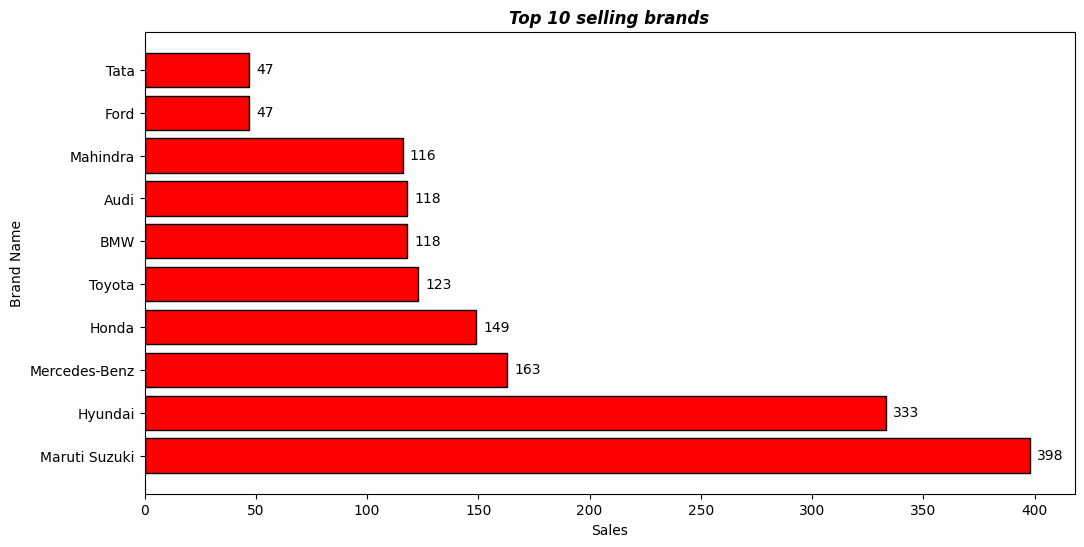

In [642]:
plt.figure(figsize = (12,6))
plt.title('Top 10 selling brands' , weight = 'bold' , style = 'italic')
plt.xlabel('Sales')
plt.ylabel('Brand Name')

bar = plt.barh( labels , values , color = 'red' , edgecolor = 'black')
plt.bar_label( bar, fmt = '%0.0f' , fontsize = 10 , padding = 5)
plt.show()

>> Sales based on fuel type .

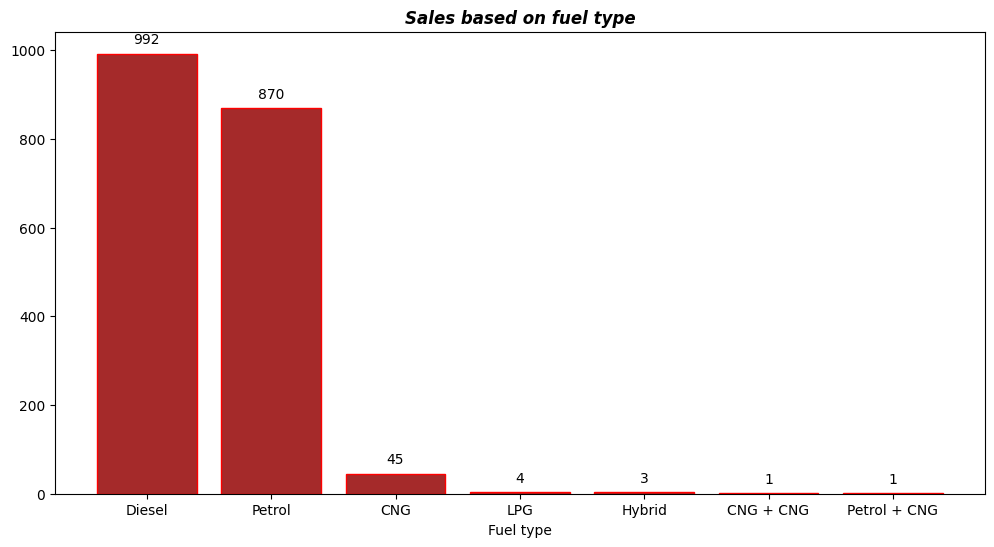

In [643]:
label1 = df['Fuel Type'].value_counts().sort_values(ascending = False).index
values1 = df['Fuel Type'].value_counts().sort_values(ascending = False).values

plt.figure(figsize = (12,6))
plt.title('Sales based on fuel type' , weight = 'bold' , style = 'italic')
plt.xlabel('Fuel type')

bar1 = plt.bar(label1 , values1 , color = 'brown' , edgecolor = 'red')
plt.bar_label(bar1 ,fmt = '%0.0f' , fontsize = 10 , padding = 5 )
plt.show()

>> Sales based on transmission type .

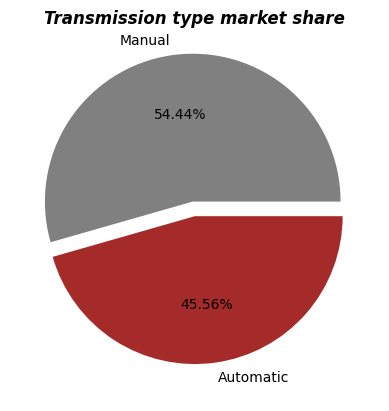

In [644]:
plt.title('Transmission type market share' , weight = 'bold' , style = 'italic')
plt.pie(df['Transmission'].value_counts() , autopct = '%1.2f%%' , explode = (0.1 ,0) , labels =df['Transmission'].value_counts().index , colors = ['grey' , 'brown'])
plt.show()

In [645]:
df.head(1)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0


>> Sales based on seating capacity

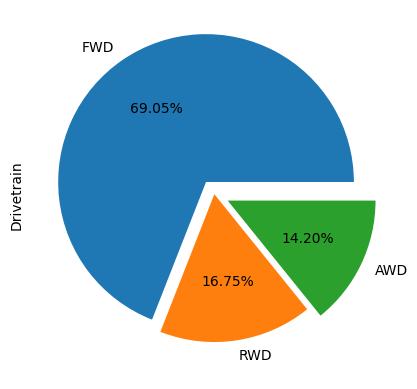

In [646]:
df['Drivetrain'].value_counts().plot(kind = 'pie' , autopct = '%1.2f%%' , explode = (0.1 , 0 , 0.1))
plt.show()

In [647]:
df.head(1)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0


>> Sales in every year .

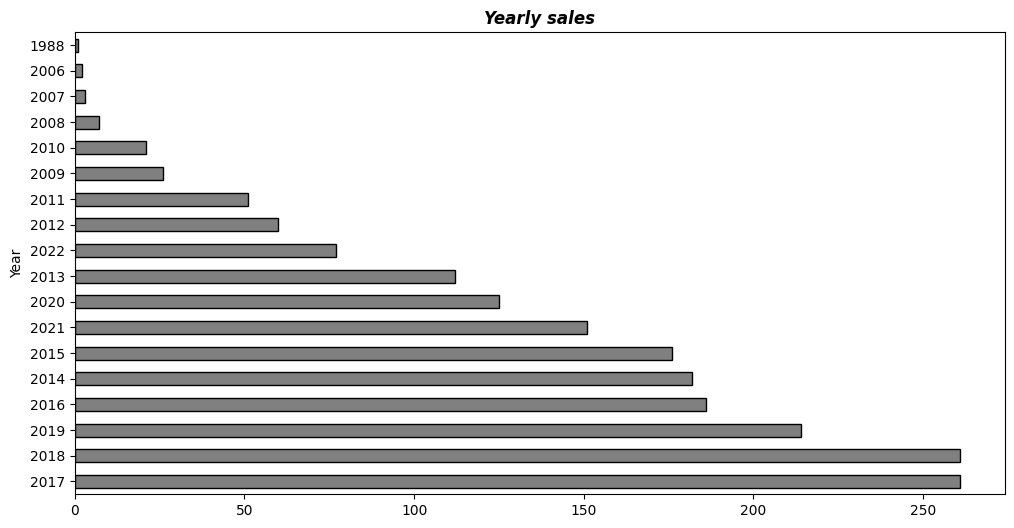

In [648]:
plt.figure(figsize = (12,6))
plt.title('Yearly sales' , weight = 'bold' , style = 'italic')
plt.ylabel('Year')

df['Year'].value_counts().sort_values(ascending = False).plot(kind = 'barh' , color = 'grey' , edgecolor = 'black')
plt.show()

In [649]:
df.head(1)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0


In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1916 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1916 non-null   object 
 1   Model               1916 non-null   object 
 2   Price               1916 non-null   int64  
 3   Year                1916 non-null   int64  
 4   Kilometer           1916 non-null   int64  
 5   Fuel Type           1916 non-null   object 
 6   Transmission        1916 non-null   object 
 7   Location            1916 non-null   object 
 8   Color               1916 non-null   object 
 9   Owner               1916 non-null   object 
 10  Seller Type         1916 non-null   object 
 11  Engine              1916 non-null   object 
 12  Max Power           1916 non-null   object 
 13  Max Torque          1916 non-null   object 
 14  Drivetrain          1916 non-null   object 
 15  Length              1916 non-null   float64
 16  Width 

                                                        FEATURE SCALING

In [651]:
df.head(1)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0


In [652]:
#stripping the cc from engine column and converting it to int

df['Engine'] = df['Engine'].str.split().str[0]
df['Engine'] = df['Engine'].astype(int)

In [653]:
#Converting the max torque to a single integer unit - Horsepower
# Horsepower = (bhp * rpm)/5252

bhp = df['Max Power'].str.split('@').str[0].str.split().str[0]
bhp = bhp.astype(float)
rpm = df['Max Power'].str.split('@').str[1].str.split().str[0]
rpm = rpm.astype(float)

#Adding a new column as horsepower
df['Horsepower'] = (bhp * rpm)/5252

In [654]:
#Converting Max Torque to Power(kw)
#Power = (nm * rpm)/25488

nm = df['Max Torque'].str.split('@').str[0].str.split().str[0]
nm = nm.astype(float)
rpm = df['Max Torque'].str.split('@').str[1].str.split().str[0]
rpm = rpm.astype(int)

#Adding a new column as power

df['Power'] = (nm * rpm) / 9.5488
df.head(1)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Horsepower,Power
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,99.390708,51367.711126


In [655]:
#check for null values 

df.isna().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Horsepower            2
Power                 0
dtype: int64

In [656]:
df = df.dropna()

In [657]:
#dropping unecessary columns 

df = df.drop(['Max Power' , 'Max Torque' , 'Model' , 'Location' , 'Color' , 'Length' , 'Width' , 'Height'] , axis = 1)
df.head(1)

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Engine,Drivetrain,Seating Capacity,Fuel Tank Capacity,Horsepower,Power
0,Honda,505000,2017,87150,Petrol,Manual,First,Corporate,1198,FWD,5.0,35.0,99.390708,51367.711126


In [658]:
#checking for colinearity

df.corr()

/tmp/ipykernel_115/2444701951.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Year,Kilometer,Engine,Seating Capacity,Fuel Tank Capacity,Horsepower,Power
Price,1.000000,0.300145,-0.145781,0.620117,-0.037663,0.567730,0.697769,0.568061
Year,0.300145,1.000000,-0.293834,-0.023529,0.005930,0.044291,0.052429,-0.032549
Kilometer,-0.145781,-0.293834,1.000000,0.056025,0.107874,0.052227,-0.087440,-0.002087
Engine,0.620117,-0.023529,0.056025,1.000000,0.324477,0.776417,0.669287,0.728409
Seating Capacity,-0.037663,0.005930,0.107874,0.324477,1.000000,0.306832,-0.140688,0.019212
Fuel Tank Capacity,0.567730,0.044291,0.052227,0.776417,0.306832,1.000000,0.479061,0.591658
Horsepower,0.697769,0.052429,-0.087440,0.669287,-0.140688,0.479061,1.000000,0.759918
Power,0.568061,-0.032549,-0.002087,0.728409,0.019212,0.591658,0.759918,1.000000


/tmp/ipykernel_115/356985599.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


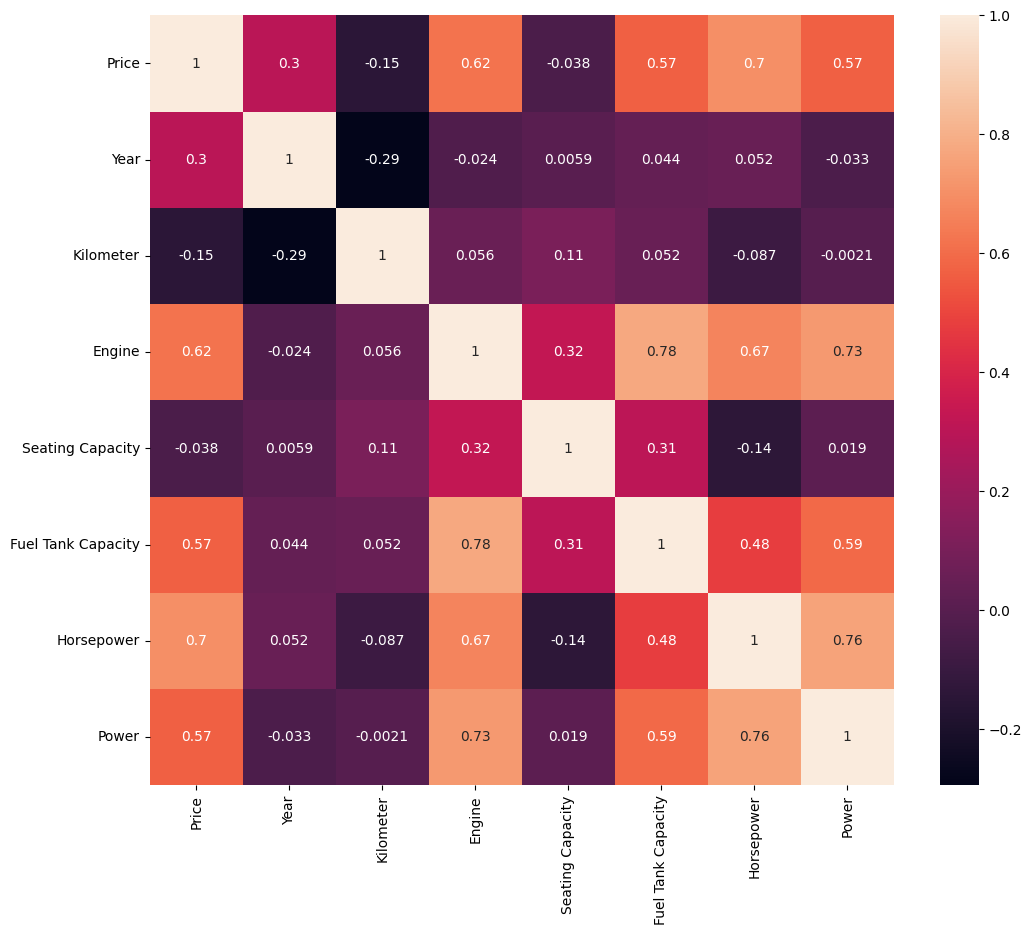

In [659]:
#checking for multi-colinearity

plt.figure(figsize = (12,10))
corr = df.corr()
sns.heatmap(corr , annot = True)
plt.show()

In [660]:
#ets write a function to check for highly co related features for more accurate model performance

def correlation(df , threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i , j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [661]:
#threshold - Domain expertise manager will set .( here i have assumed as 85 percent)
corr_features = correlation(df, 0.75)
corr_features

#There are no highly correlated features

/tmp/ipykernel_115/3879971936.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


{'Fuel Tank Capacity', 'Power'}

In [662]:
df.head(1)

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Engine,Drivetrain,Seating Capacity,Fuel Tank Capacity,Horsepower,Power
0,Honda,505000,2017,87150,Petrol,Manual,First,Corporate,1198,FWD,5.0,35.0,99.390708,51367.711126


                                                           MODEL BUILDING

>> Checking for Outliers

In [663]:
#checking for outliers in the dependent variable - Price
#calculate z-score for each value 

z = np.abs(df['Price'] - df['Price'].mean())/df['Price'].std()

#check for outliers
outliers = df['Price'][z>3]
outliers.index

Int64Index([  95,  160,  259,  305,  442,  472,  483,  510,  542,  582,  643,
             750,  785,  977, 1154, 1164, 1178, 1246, 1275, 1305, 1313, 1369,
            1370, 1576, 1742, 1803, 1890, 1912],
           dtype='int64')

<Axes: >

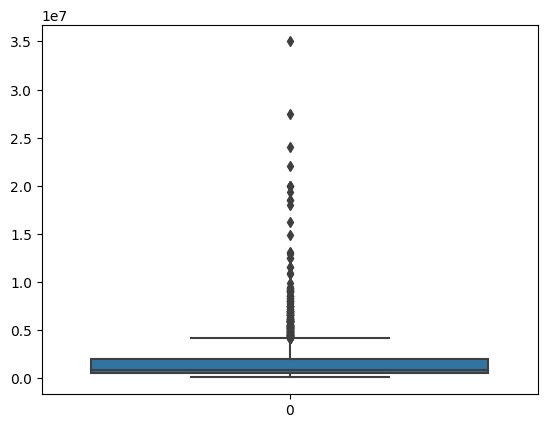

In [664]:
sns.boxplot(df['Price'])

In [665]:
#inspecting the outliers to check whether the price is justifiable based on brand and other features

df.loc[[95,  160,  259,  305,  442,  472,  483,  510,  542,  582,  643,750,  785,  977, 1154, 1164, 1178, 1246, 1275, 1305, 1313, 1369,1370, 1576, 1742, 1803, 1890, 1912]]

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Engine,Drivetrain,Seating Capacity,Fuel Tank Capacity,Horsepower,Power
95,Porsche,16200000,2022,2766,Petrol,Automatic,First,Individual,2995,AWD,4.0,75.00000,338.061691,63149.296247
160,Mercedes-Benz,11500000,2016,27000,Petrol,Automatic,First,Individual,4663,RWD,4.0,70.00000,452.827494,131953.753351
259,Land Rover,12500000,2022,22010,Petrol,Automatic,First,Individual,1997,AWD,5.0,104.00000,309.977152,62835.120643
305,Porsche,9300000,2019,9000,Petrol,Automatic,First,Corporate,3436,AWD,4.0,68.00000,457.920792,228719.839142
442,Mercedes-Benz,18500000,2021,21000,Petrol,Automatic,First,Individual,3982,RWD,4.0,70.00000,462.823686,146615.281501
472,Mercedes-Benz,9390000,2022,14000,Diesel,Automatic,First,Individual,1950,AWD,5.0,93.00000,192.726580,83780.160858
483,Ferrari,35000000,2018,9500,Petrol,Automatic,First,Individual,3902,RWD,2.0,78.00000,1005.331302,238773.458445
510,Lamborghini,24000000,2016,6000,Petrol,Automatic,First,Individual,5204,AWD,2.0,52.00221,945.639756,381199.731903
542,Mercedes-Benz,13000000,2021,20000,Diesel,Automatic,First,Individual,2925,AWD,7.0,90.00000,223.457730,87969.168901
582,Land Rover,22000000,2019,35000,Diesel,Automatic,First,Individual,2993,AWD,5.0,105.00000,185.833968,125670.241287


Since the cars are luxury brands the price of the car being high is justifiable . Hence these outliers are not considered as innacurate data .

                                                            ENCODING 

In [666]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df[['Fuel Type' , 'Transmission' , 'Owner' , 'Seller Type' , 'Make' , 'Drivetrain' , 'Year']] = df[['Fuel Type' , 'Transmission' , 'Owner' , 'Seller Type' ,'Make' , 'Drivetrain' ,'Year']].apply(encoder.fit_transform)

In [667]:
df.head(3)

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Engine,Drivetrain,Seating Capacity,Fuel Tank Capacity,Horsepower,Power
0,7,505000,12,87150,5,1,0,1,1198,1,5.0,35.0,99.390708,51367.711126
1,19,450000,9,75000,2,1,1,2,1248,1,5.0,42.0,56.359482,39795.576408
2,8,220000,6,67000,5,1,0,2,1197,1,5.0,35.0,90.251333,47236.050603


In [668]:
#checking all the datatype once again.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 2058
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1914 non-null   int64  
 1   Price               1914 non-null   int64  
 2   Year                1914 non-null   int64  
 3   Kilometer           1914 non-null   int64  
 4   Fuel Type           1914 non-null   int64  
 5   Transmission        1914 non-null   int64  
 6   Owner               1914 non-null   int64  
 7   Seller Type         1914 non-null   int64  
 8   Engine              1914 non-null   int64  
 9   Drivetrain          1914 non-null   int64  
 10  Seating Capacity    1914 non-null   float64
 11  Fuel Tank Capacity  1914 non-null   float64
 12  Horsepower          1914 non-null   float64
 13  Power               1914 non-null   float64
dtypes: float64(4), int64(10)
memory usage: 288.8 KB


                                                    MODEL TRAINING & SCALING

In [669]:
df.columns

Index(['Make', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission',
       'Owner', 'Seller Type', 'Engine', 'Drivetrain', 'Seating Capacity',
       'Fuel Tank Capacity', 'Horsepower', 'Power'],
      dtype='object')

In [670]:
#seperating the independent and dependent features

x = df[['Make', 'Year', 'Kilometer', 'Fuel Type', 'Transmission',
       'Owner', 'Seller Type', 'Engine', 'Drivetrain', 'Seating Capacity', 'Fuel Tank Capacity', 'Horsepower',
       'Power']]

y = df['Price']

In [671]:
#spllitting the data to test and train split 

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.25 , random_state = 42)

In [672]:
#Feature scaling - Standardization 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[-0.75444327,  0.76706302, -0.40169715, ..., -0.46490441,
         0.29554342, -1.15649863],
       [ 0.44146826, -0.53828585,  0.12656242, ..., -1.14234815,
        -0.9437693 , -1.22487739],
       [-0.75444327,  0.76706302, -0.67724667, ..., -0.60039316,
        -0.3502956 , -0.33595349],
       ...,
       [-1.51547787,  1.74607467, -0.55360286, ...,  0.55126119,
         1.98752529, -0.12252887],
       [-0.75444327, -0.53828585, -0.13756737, ..., -0.46490441,
        -0.3328405 , -0.31937682],
       [ 0.33274903,  0.76706302,  0.32854402, ...,  1.22870493,
        -0.09501464,  0.38513163]])

/tmp/ipykernel_115/2125450292.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


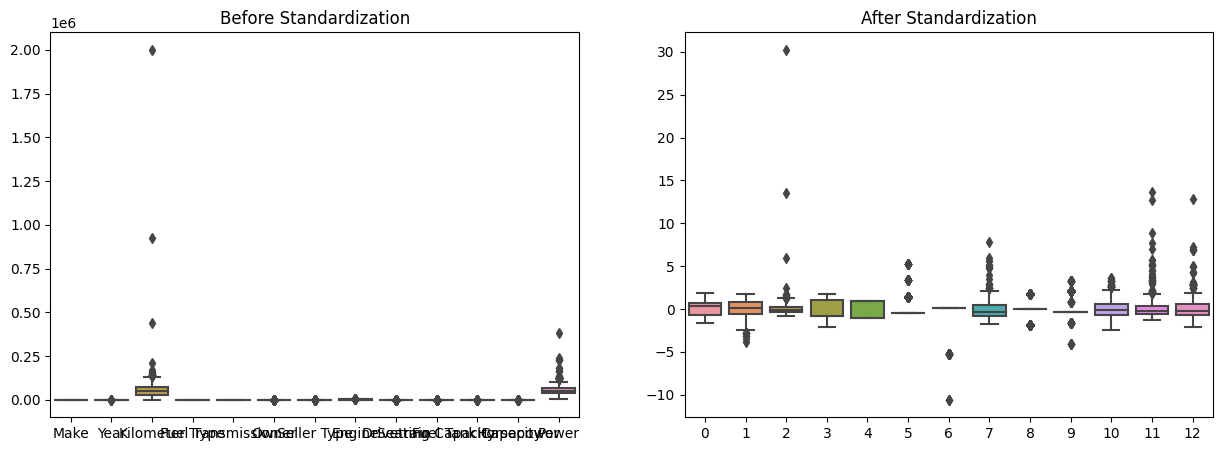

In [673]:
#checking the transformation of data after standardixation 

plt.subplots(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title('Before Standardization')

plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title('After Standardization')
plt.show()